# PYTHON FOR DATA ANALYSIS TP6

# 1) SCRAPING SESSION , 3h


Objectifs : 

- Maitrise requests + beautifoulsoup et / ou selenium
- Maitrise Outils de developpement web / HTML CSS / clic droit inspecter / CSS selectors


Choisissez un thème de scraping parmi les suivants : 

- Resultats sportifs : date, équipe/joueur 1 , équipe/joueur2, score ..
- Stock market : date/heure, stock, valeur
- Google search results pour un mot clé donné : titre page, description, url, position
- Pollution : date/heure mesure, indice mesuré, valeur
- playlist radio : date/heure diffusion, artiste, morceau (https://www.nova.fr/radionova/radio-nova )
- site marchand : marque, nom produit , prix  ...
- annonces immo : titre, prix , m2

Automatisez la collecte des données en vous limitant à 100 résultats dans un premier temps
Insérez les données propres dans un DataFrame, en ne conservant que les données utiles. 
Choisissez un affichage révélateur, graphique ou sous forme de tableau.




Aspect légal : c'est l'utilisation que vous allez en faire qui peut être condamnée, par le scraping en soi.


# etudier les worlds de league of legend

In [1]:
!pip install bs4

In [3]:
!pip install selenium

In [5]:
from selenium import webdriver
import time
import requests
import shutil
import os

In [22]:
import requests as req         # module de requête http
from bs4 import BeautifulSoup

url = "https://lol.gamepedia.com/2020_Season_World_Championship/Champion_Statistics"
page  = req.request("get", url )
html  = page.text
soup  = BeautifulSoup(html)

In [23]:
html

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>2020 Season World Championship/Champion Statistics - Leaguepedia | League of Legends Esports Wiki</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"2020_Season_World_Championship/Champion_Statistics","wgTitle":"2020 Season World Championship/Champion Statistics","wgCurRevisionId":2233818,"wgRevisionId":2233818,"wgArticleId":428297,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Tournament Player Statistics Pages"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTabl

In [24]:
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>2020 Season World Championship/Champion Statistics - Leaguepedia | League of Legends Esports Wiki</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"2020_Season_World_Championship/Champion_Statistics","wgTitle":"2020 Season World Championship/Champion Statistics","wgCurRevisionId":2233818,"wgRevisionId":2233818,"wgArticleId":428297,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Tournament Player Statistics Pages"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""

In [29]:
#Recuperation du tableau
gdp = soup.find_all("table", attrs={"class": "wikitable"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  2


In [27]:

table1 = gdp[0]
body = table1.find_all("tr")



#Recuperation du header
head = body[4] 
headings = []
for item in head.find_all("th"):
    item = (item.text).rstrip("\n")
    headings.append(item)
    
headings.append("Année")
print(headings)

#On remplace les G car on en a 3 et ils ne veulent rien tel quel
headings[1] = "Game"
headings[4] = "Game_Played"
headings[15] = "Moyenne_Gold"
print(headings)

['Champion', 'G', 'PB%', 'B', 'G', 'By', 'W', 'L', 'WR', 'K', 'D', 'A', 'KDA', 'CS', 'CS/M', 'G', 'G/M', 'KPAR', 'KS', 'GS', 'As', 'Année']
['Champion', 'Game', 'PB%', 'B', 'Game_Played', 'By', 'W', 'L', 'WR', 'K', 'D', 'A', 'KDA', 'CS', 'CS/M', 'Moyenne_Gold', 'G/M', 'KPAR', 'KS', 'GS', 'As', 'Année']


In [11]:
import regex as re

body_rows = body[5:] 
len(body_rows)

90

In [30]:
body_rows

[<tr><td class="spstats-subject"><span class="markup-object champion-object"><span class="sprite champion-sprite" style="background-position:-129px -103px;background-size:387px auto;width:25px;height:25px" title="Lucian"><br/></span><span>Lucian</span></span></td><td class="spstats-bold">71</td><td class="spstats-bold">93.4%</td><td>60</td><td><a class="text" href="https://lol.fandom.com/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Champion&amp;MHP%5Bchampion%5D=Lucian&amp;MHP%5Btournament%5D=2020%20Season%20World%20Championship/Main%20Event&amp;pfRunQueryFormName=MatchHistoryPlayer" rel="noreferrer noopener" target="_blank">11</a></td><td class="spstats-bold"><a class="text" href="https://lol.fandom.com/Special:RunQuery/TournamentStatistics?TS%5Bpreload%5D=ChampionByPlayer&amp;TS%5Bchampion%5D=Lucian&amp;TS%5Btournament%5D=2020%20Season%20World%20Championship/Main%20Event&amp;pfRunQueryFormName=TournamentStatistics" rel="noreferrer noopener" target="_blank">9</a></td><td>6</td

In [12]:
#recuperation des lignes
date = "2020"
all_rows = [] 
for nb_ligne in range(len(body_rows)): 
    row = []
    for item in body_rows[nb_ligne].find_all("td"):
        aa = re.sub("(\xa0)|(\n)|,","",item.text)
        row.append(aa)
    row.append(date)
    all_rows.append(row)

In [13]:
import pandas as pd

df = pd.DataFrame(data=all_rows,columns=headings)
df.head(20)

,Champion,Game,PB%,B,Game_Played,By,W,L,WR,K,...,KDA,CS,CS/M,Moyenne_Gold,G/M,KPAR,KS,GS,As,Année
0,Ornn,102,89.5%,62,40,17,24,16,60%,1.7,...,4.45,236.03,7.36,11.3,354,64%,12.2%,19.8%,,2020
1,Nidalee,102,89.5%,71,31,14,18,13,58.1%,3.23,...,4.29,215.97,6.74,11.7,365,70.2%,24%,20.3%,,2020
2,Graves,99,86.8%,30,69,21,35,34,50.7%,3.61,...,3.73,218.49,6.87,11.8,370,68.2%,27.8%,20.8%,,2020
3,Lucian,94,82.5%,78,16,13,9,7,56.3%,4,...,2.87,287.88,8.89,13.8,427,62.9%,30.5%,23.8%,,2020
4,Syndra,84,73.7%,47,37,15,19,18,51.4%,3.24,...,3.35,289.32,8.83,13,396,60.3%,23.5%,22.5%,,2020
5,Camille,80,70.2%,53,27,15,15,12,55.6%,3.85,...,2.78,260.48,7.97,13.3,408,55.3%,24.4%,22.4%,,2020
6,Renekton,79,69.3%,46,33,14,13,20,39.4%,2.33,...,1.87,259.48,8.03,12.3,380,54.2%,19.4%,21.8%,,2020
7,Twisted Fate,78,68.4%,55,23,10,13,10,56.5%,3.22,...,4.79,262.7,8.43,13.5,434,73.5%,21.8%,23.3%,,2020
8,Orianna,73,64%,34,39,18,25,14,64.1%,3.69,...,5.12,303.87,9.03,14,417,69.4%,26.4%,23.2%,,2020
9,Lillia,71,62.3%,30,41,14,17,24,41.5%,2.8,...,2.98,208.32,6.5,11.3,352,70.5%,20.9%,20%,,2020


In [14]:
#Maintenant on va prendre de 2014 à 2020
import requests as req         # module de requête http
from bs4 import BeautifulSoup
import regex as re

diff_page = ["Season_1_World_Championship", "Season_2_World_Championship", "Season_3_World_Championship", 
             "2014_Season_World_Championship", "2015_Season_World_Championship", "2016_Season_World_Championship", 
             "2017_Season_World_Championship/Main_Event", "2018_Season_World_Championship/Main_Event", 
             "2019_Season_World_Championship/Main_Event", "2020_Season_World_Championship/Main_Event"]

annee = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
all_rows = [] 

for index in range(len(annee)):

    url = "https://lol.gamepedia.com/"+diff_page[index]+"/Champion_Statistics"
    page  = req.request("get", url )
    html  = page.text
    soup  = BeautifulSoup(html)
    
    #Recuperation des tables wikitables
    gdp = soup.find_all("table", attrs={"class": "wikitable"})
    table1 = gdp[0]
    body = table1.find_all("tr")

    #Recuperation des lignes
    body_rows = body[5:] 
    for nb_ligne in range(len(body_rows)): 
        row = []
        for item in body_rows[nb_ligne].find_all("td"):
            aa = re.sub("(\xa0)|(\n)|,","",item.text)
            row.append(aa)
        row.append(annee[index])
        all_rows.append(row)

In [15]:
df = pd.DataFrame(data=all_rows,columns=headings)
df.head(800)

,Champion,Game,PB%,B,Game_Played,By,W,L,WR,K,...,KDA,CS,CS/M,Moyenne_Gold,G/M,KPAR,KS,GS,As,Année
0,Nunu,27,96.4%,9,18,6,12,6,66.7%,1.06,...,3.63,90.17,2.46,9.4,256,-,-,-,,2011
1,Alistar,25,89.3%,12,13,4,8,5,61.5%,3.46,...,4.03,114,3.11,9.6,261,-,-,-,,2011
2,Rumble,23,82.1%,21,2,2,2,0,100%,3.5,...,8.33,162,5.02,10.1,311,-,-,-,,2011
3,Vladimir,22,78.6%,14,8,5,3,5,37.5%,4.5,...,2.39,224.63,5.99,11.2,298,-,-,-,,2011
4,Twisted Fate,22,78.6%,18,4,2,2,2,50%,2,...,1.67,206.5,5.43,11.4,299,-,-,-,,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,LeBlanc,1,1.3%,-,1,1,0,1,0%,2,...,1.5,289,7.83,13.7,371,60%,20%,23.1%,,2020
689,Quinn,1,1.3%,-,1,1,0,1,0%,2,...,2,262,8.15,12.7,394,88.9%,22.2%,22.1%,,2020
690,Ryze,1,1.3%,-,1,1,0,1,0%,1,...,1.25,177,7.45,7.7,324,62.5%,12.5%,20.2%,,2020
691,Urgot,1,1.3%,-,1,1,0,1,0%,3,...,1,239,7.27,11.5,349,66.7%,50%,22.1%,,2020


In [16]:
#header
#Champion = nom du champion
#Game = nombre de game dans lequel on a vu le champion apparaitre
#PB% = Pick et Ban % => Nb de fois qu'un champion est pris ou banni / Nb de Game
#B = Nb de fois ou le champion est Banni
#Game_played = Nb de Game joué
#By = Nombre de joueur different ayant joue le champion
#W = Nb de victoire
#L = Nb de défaite
#WR = la ratio de victoire W/L
#K = Nombre de kill moyen par partie de jeu
#D = Nombre de mort moyenne par partie de jeu
#A = Nombre d'assistance moyen par partie de jeu
#KDA = (Kill+Assist)/Death
#CS = nombre de montre tué par partie
#CS/M = nombre de montre tué par partie / Minutes
#KPAR = (Nombre de personne tue par vous + assistance) / Nb de personne tué dans la partie de jeu
#GS = Gold obtenu par le champion / Gold totale obtenue par votre équipe dans la partie
#AS = poste au sein du jeu

In [17]:
#Les personnage le plus présent dans les compétitions mondiales depuis le début de ceux-ci
df["Game"] = df["Game"].apply(lambda d : int(d))
df[["Champion","Game"]].groupby("Champion").sum().sort_values(by="Game")

,Game
Champion,
Tryndamere,1
Neeko,1
Teemo,3
Kayn,4
Rammus,4
...,...
Elise,235
Ryze,260
Alistar,285


In [18]:
#Les personnage le plus bannis
df["B"] = df["B"].apply(lambda d :  0 if d=='-' else int(d))
df[["Champion","B"]].groupby("Champion").sum().sort_values(by="B")

,B
Champion,
Dr. Mundo,0
Riven,0
Udyr,0
Teemo,0
Tryndamere,0
...,...
Twisted Fate,118
Kalista,124
Nidalee,156


Text(0.5, 0, 'Année')

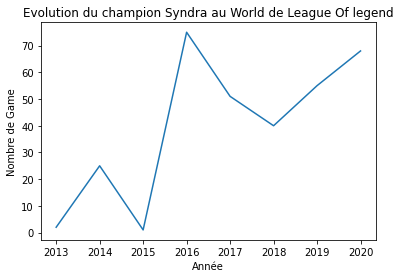

In [19]:
#L'evolution de syndra en competition
evolution_syndra = df[df["Champion"] == "Syndra"].reset_index()[["Année","Game"]]

import matplotlib.pyplot as plt
plt.plot(evolution_syndra["Année"],evolution_syndra["Game"])
plt.title("Evolution du champion Syndra au World de League Of legend")
plt.ylabel("Nombre de Game")
plt.xlabel("Année")

In [20]:
#L'evolution des champions ayant été pick au moins 200x

#L'evolution de syndra en competition
nb_game_champion = df[["Champion","Game"]].groupby("Champion").sum()
nb_game_champion_200p = nb_game_champion[nb_game_champion["Game"]>250].reset_index()
nb_game_champion_200p


,Champion,Game
0,Alistar,285
1,Lee Sin,285
2,Ryze,260
3,Syndra,317


Text(0.5, 0, 'Année')

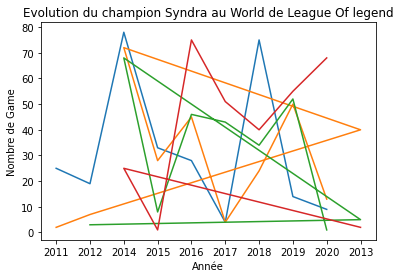

In [21]:
for champ in nb_game_champion_200p["Champion"]:
    evolutions_champion = df[df["Champion"] == champ][["Année","Champion","Game"]].reset_index()
    evolutions_champion
    plt.plot(evolutions_champion["Année"],evolutions_champion["Game"])

plt.title("Evolution du champion Syndra au World de League Of legend")
plt.ylabel("Nombre de Game")
plt.xlabel("Année")

# 2) ML With Scikit-Learn